In [15]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform, seed
import numpy as np
import pandas as pd
import csv
import time
from igraph import *
from functions_EX4 import *

In [16]:
with open('Highschool_network_edge.csv') as csvfile:
    reader = csv.reader(csvfile)
    edges = [(int(row[0][1:]), int(row[1][1:])) for row in reader]

NodeID = []
Gender = []
Hall = []
Threshold = []

with open('Highschool_network_att.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        NodeID.append(int(row[0][1:]))
        Gender.append(row[1])
        Hall.append(row[2])
        Threshold.append(row[3])

g = Graph(edges, directed=False)

# g.vs["Gender"] = Gender
# g.vs["Hall"] = Hall
# g.vs["Threshold"] = Threshold

In [17]:
g = Graph(edges, directed=False)
g.delete_vertices(0)
# Number of components
g.vs["NodeID"] = NodeID
print("Number of components: ", g.vcount())


Number of components:  122


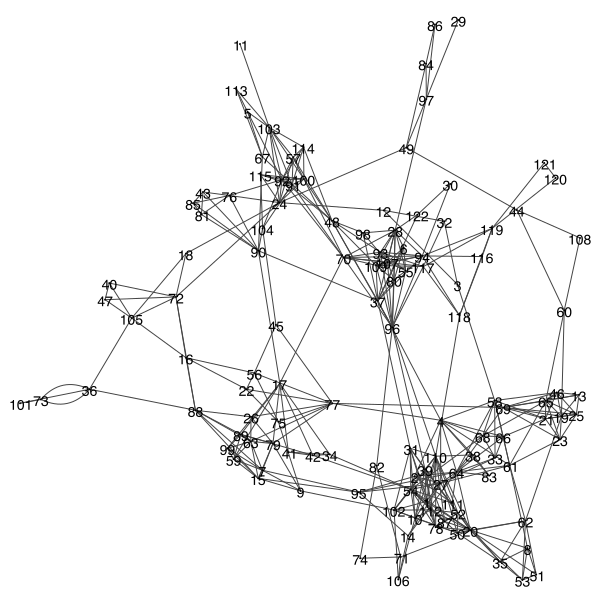

In [5]:
plot(g, bbox = (600,600), margin = 20, layout = g.layout("auto"), vertex_size = 1, vertex_color = "white", vertex_label = g.vs["NodeID"])


In [15]:
greedy_immunized(g, 3, 0.15, mc=600)

([95, 36, 69],
 [74.63333333333334, 50.44166666666667, 39.18666666666667],
 [68.86206698417664, 117.58539700508118, 150.61926889419556])

In [17]:
greedy(g, 3, 0.15, mc=200) # works to slow

([53, 91, 72],
 [[111.265, 29.265], [116.065, 110.285], [115.505, 114.04]],
 [83.30296015739441, 246.99532890319824, 400.85232615470886])

In [ ]:
1, 92, 19 прошлый обычый 
53, 91, 72 новый обычный
новый иммунный 95, 36, 69
прошлый иммунный 96, 14, 102

In [18]:
# creating the list of infected nodes per day
No_immunity = IC_immunized(g, [106], [], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Degree = IC_immunized(g, [106], [53, 19, 109], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Betweenness = IC_immunized(g, [106], [36, 3, 95], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Greedy = IC_immunized(g, [106], [53, 91, 72], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Greedy2 = IC_immunized(g, [106], [96, 14, 102], p = 0.15, mc = 100, timestamps = 28 , Monte_Carlo=False)

KeyboardInterrupt: 

In [44]:
# Creating a list of days as x-axis
days = list(range(1, len(Greedy[2]) + 1))

# Plotting the three lists
plt.plot(days, No_immunity[2], label='No_immunity')
plt.plot(days, Degree[2], label='Degree heuristic')
plt.plot(days, Betweenness[2], label='Betweenness heuristic')
plt.plot(days, Greedy[2], label='Greedy with Influence Maximization')
plt.plot(days, Greedy2[2], label='Greedy with Influence Minimization')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('Daily Infected Cases')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

NameError: name 'No_immunity' is not defined

# Question 19

In [19]:
# Original dictionary with values
original_dict = {0:15, 1:5, 2:5, 3:1, 4:2, 5:2, 6:1, 7:1, 8:1, 9:0, 10:4}

# Calculate total sum of original values
total_sum = sum(original_dict.values())

# Desired total sum
desired_sum = 122

# Scale factor
scale_factor = desired_sum / total_sum

# Create a new dictionary to store the scaled values
scaled_dict = {}

# Scale up each value proportionally and round to nearest integer
for key, value in original_dict.items():
    scaled_value = round(value * scale_factor)
    scaled_dict[key] = scaled_value

# Check if the total sum of scaled values is less than the desired sum
# If so, add the difference to the highest key (">=10")
total_scaled_sum = sum(scaled_dict.values())
if total_scaled_sum < desired_sum:
    diff = desired_sum - total_scaled_sum
    scaled_dict[10] += diff

Threshold_list = []
for key, value in scaled_dict.items():
    Threshold_list.extend([key] * value)

# Shuffle the list to randomize the distribution
np.random.shuffle(Threshold_list)

scaled_dict


{0: 49, 1: 16, 2: 16, 3: 3, 4: 7, 5: 7, 6: 3, 7: 3, 8: 3, 9: 0, 10: 15}

In [ ]:
greedy_immunized_Th(g, 3, Threshold_list, mc=600)

In [9]:
greedy_Th(g, 7, Threshold_list, mc=100)

KeyboardInterrupt: 

In [5]:
degree_centrality = g.degree()
sorted_nodes = sorted(range(len(degree_centrality)), key=degree_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Degree Centrality: ", top_7_nodes)

Top 7 Nodes based on Degree Centrality:  [53, 19, 109, 63, 95, 27, 36]


In [6]:
betweenness_centrality = g.betweenness()
sorted_nodes = sorted(range(len(degree_centrality)), key=betweenness_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Betweenness Centrality: ", top_7_nodes)

Top 7 Nodes based on Betweenness Centrality:  [36, 3, 95, 23, 69, 76, 16]


In [20]:
# No_immunity = th_model([106], g, Threshold_list, [], mc=100, Monte_Carlo = True)
Degree = th_model([53, 19, 109, 63, 95, 27, 36], g, Threshold_list,[],  mc=100, Monte_Carlo = True)
Betweenness = th_model([36, 3, 95, 23, 69, 76, 16], g, Threshold_list, [], mc=100, Monte_Carlo = True)
Greedy = th_model([8, 119, 120, 121, 111, 116, 115], g, Threshold_list, [], mc=100, Monte_Carlo = True)

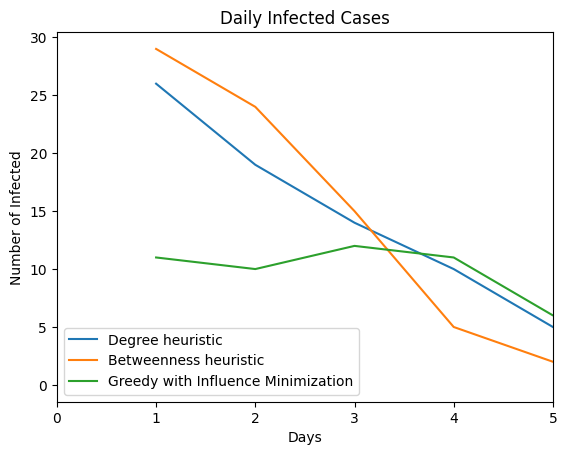

In [21]:
# Creating a list of days as x-axis
days = list(range(1, len(Greedy[2]) + 1))

# Plotting the three list
plt.plot(days, Degree[2], label='Degree heuristic')
plt.plot(days, Betweenness[2], label='Betweenness heuristic')
plt.plot(days, Greedy[2], label='Greedy with Influence Minimization')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('Daily Infected Cases')
# Setting x-axis limit to show only 0 to 5 days
plt.xlim(0, 5)
# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [22]:
# Prepare input for the 'calculate_adopted_nei' function
adj_matrix = g.get_adjacency()
adj_matrix = np.array(adj_matrix.data)
each_neighbors = adj_matrix.nonzero()

each_neighbors = {node: each_neighbors[1][each_neighbors[0] == node].tolist() for node in range(g.vcount())}

n_node = g.vcount()
node_status = [0] * n_node 
neighbour_status = [0] * n_node
new_infected = []
day_total_infected = [0] * 28

seed_list = [53]
# Day 1
day = 1
sum_of_ifected = 0 
infected_per_day = []
for node in seed_list: 
    node_status[node] = 1

new_infected.append([106, 1,7])

day_total_infected[day - 1] = sum(node_status)
#print(node_status)
for day in range(2, 28):
    not_adopted = [node for node in range(n_node) if node_status[node] == 0]
    adopted = [node for node in range(n_node) if node_status[node] == 1]
    neighbour_status = {node : calculate_adopted_nei(node, node_status, each_neighbors) for node in range(n_node)}
    infected = []
    for node in adopted:
        for neighbour in g.neighbors(node):
            if neighbour_status[neighbour] >= Threshold_list[node] and neighbour not in adopted and neighbour not in infected: 
                infected.append(neighbour)
    
    new_infected.append(infected)
    for node in new_infected[day - 1]:
        node_status[node] = 1
    sum_of_ifected += len(adopted)
    day_total_infected[day - 1] = sum(node_status)
    
    infected_per_day.append(len(new_infected[day - 1]))

infected_per_day

[17,
 148,
 264,
 447,
 587,
 639,
 651,
 662,
 677,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681,
 681]

In [53]:
neighbour_status = [calculate_adopted_nei(node, node_status, each_neighbors) for node in not_adopted]
neighbour_status


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
def calculate_adopted_nei(node: int, node_status: list, each_neighbors: dict) -> float:
    """
    Calculate the percentage of adopted neighbors for a given node.

    Parameters:
    -----------
    node : int
        The index of the node for which to calculate the percentage of adopted neighbors.
    node_status : list
        A list representing the status (0 or 1) of each node in the network.
    each_neighbors : dict
        A dictionary where the keys are node indices and the values are lists of indices of neighbors of each node.

    Returns:
    --------
    float
        The percentage of adopted neighbors for the given node.
    """

    adopted_nei = [node_status[nei] == 1 for nei in each_neighbors[node]]
    return len(adopted_nei)

In [10]:
node_status

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0]